# Changing Model Thresholds with SVC
- Thresholds are possible for parametric classifiers
    - LogisticRegression
    - LogisticRegressionCV
    - SGDClassifier
    - SVC
    - Dicriminant Analysis
    
These algorithms/methods have parametric-like parts to the algorithm but are not dependend up distribution assumptions.
    - RandomForests
    - Neural Network
- I am going to use SVC() in comparing how the balancing effects the outcomes
- At the bottom of the page, I will adjust the threshold to see the effects on the classification scores.  

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Pipeline that allows data balancing
from imblearn.pipeline import Pipeline

# data balancing packages
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# model prep and model
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# cross validation for imbalanced data
from sklearn.model_selection import RepeatedStratifiedKFold, train_test_split

# custom evaluation
from evaluator import model_evaluate

In [2]:
# Loading data
# file_path = Path("../data/myopia.csv")
file_path = Path("../eda/reduced_filtered_df.csv")
df = pd.read_csv(file_path)
df.head(1)

<IPython.core.display.Javascript object>

,ACD,LT,VCD,SPORTHR,DADMY,delta_spheq,total_positive_screen,MYOPIC
0,3.702,3.392,15.29,4,1,1.358,8,0


In [3]:
# Check dataset balance
df["MYOPIC"].value_counts()

0    323
1     49
Name: MYOPIC, dtype: int64

In [4]:
# Define X,y
label = df["MYOPIC"]
X = df.iloc[:,:-1].copy()

In [5]:
# Note the use of strategy since the dataset is imbalanced. 
# I am isolaating the X_test and y_test from the preprossing 
X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=42, test_size=0.1, stratify=label)

<IPython.core.display.Javascript object>

## No Balancing - baseline model

--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.027
Mean recall: 0.017
Mean precision: 0.067
Mean ROC AUC: 0.747


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=39, Test: 0=29, 1=5
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29, 1=4
>Train: 0=261, 1=40, Test: 0=29

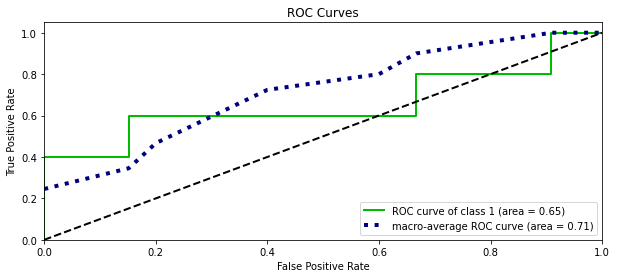



Precision-Recall Curve AUC:  0.52



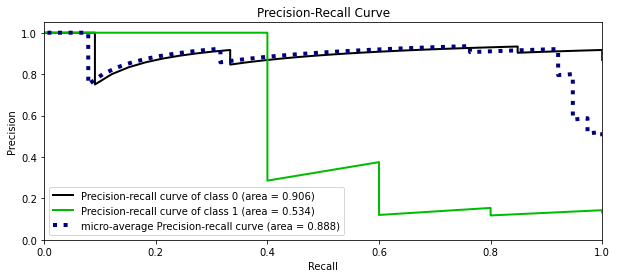

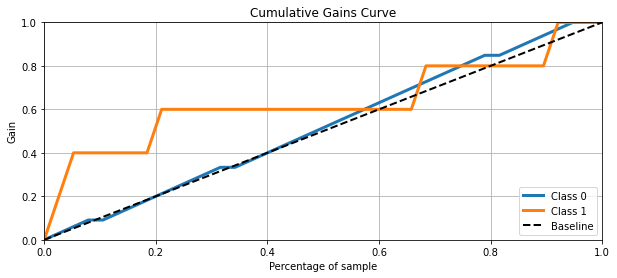

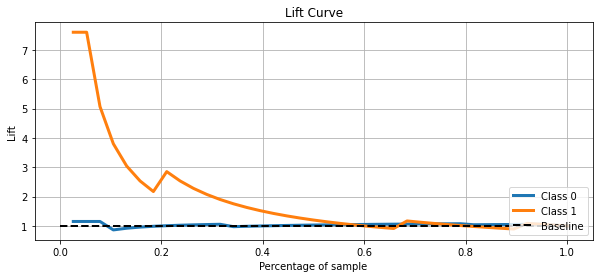



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.055        0.0        0.0
     0.057        0.2        0.0
     0.073        0.4        0.0
     0.076        0.4       0.15
     0.077        0.6       0.15
     0.079        0.6       0.67
     0.083        0.8       0.67
     0.085        0.8       0.91
     0.088        1.0       0.91
     0.088        1.0        1.0




In [6]:
scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [("scaler", StandardScaler()),('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

In [7]:
# As shown by the cross validation averages, the model did not predict the minority class very well.
# In fact, without scaling the data the model would not produce any predictions.  
# The holdout data showed some results but these might be artificially high since the data set is small.   
# I would also note that the threshold values are very small which make me question the predictive quality.
# Overall this is not a good model for this data.


## Balancing Data - RandomOverSampler

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.390
Mean recall: 0.592
Mean precision: 0.298
Mean ROC AUC: 0.771


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261

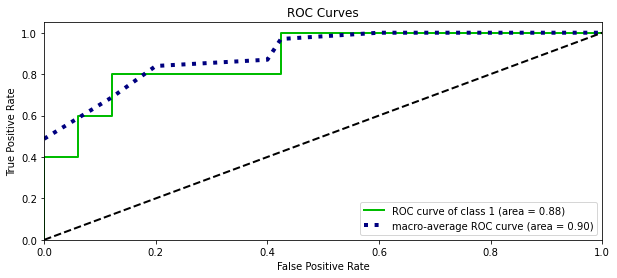



Precision-Recall Curve AUC:  0.65



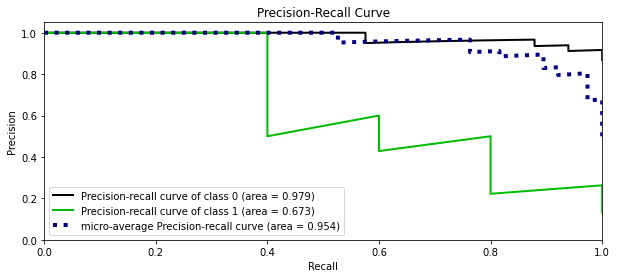

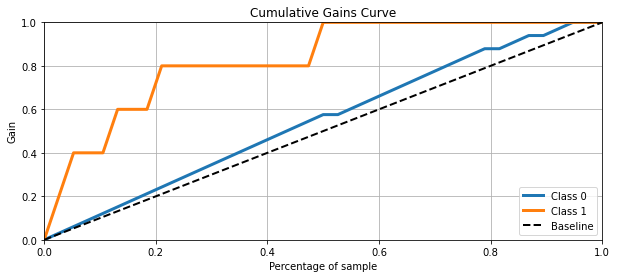

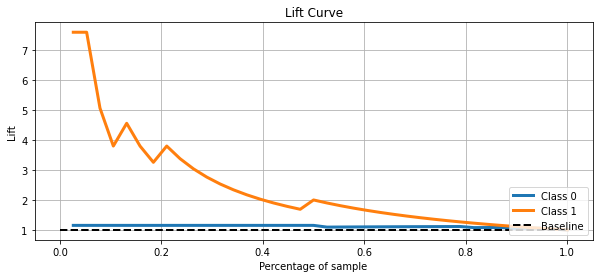



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.003        0.0        0.0
     0.004        0.2        0.0
     0.004        0.4        0.0
     0.006        0.4       0.06
     0.008        0.6       0.06
     0.008        0.6       0.12
      0.01        0.8       0.12
     0.012        0.8       0.42
     0.012        1.0       0.42
     0.014        1.0        1.0




In [9]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_ros))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', ros), ("scaler", StandardScaler()), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

## Analysis
```
Mean ROC AUC: 0.771
This model works better.  Training on balanced data and evaluating using cross validation produce similar responses.


```

## Balancing Data - SMOTE
- synthetic minority over-sampling technique

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.393
Mean recall: 0.553
Mean precision: 0.318
Mean ROC AUC: 0.772


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261

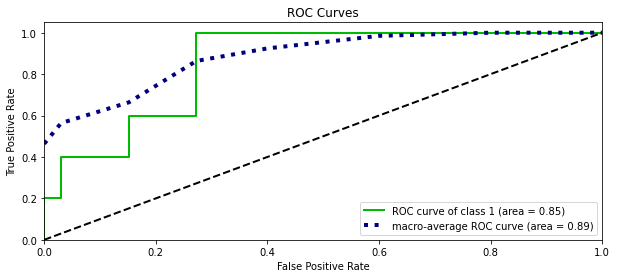



Precision-Recall Curve AUC:  0.5



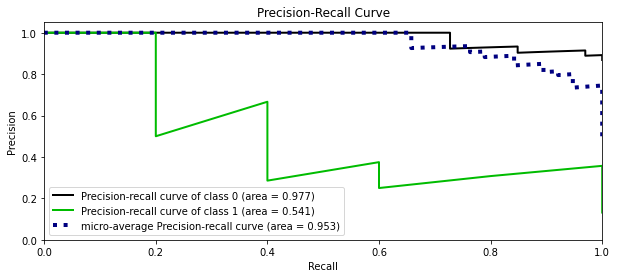

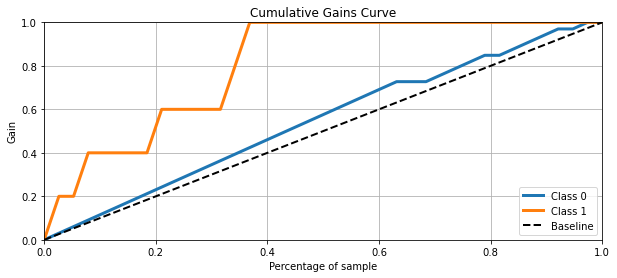

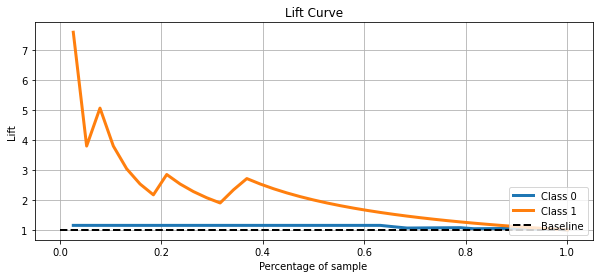



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.002        0.0        0.0
     0.003        0.2        0.0
     0.003        0.2       0.03
     0.003        0.4       0.03
     0.004        0.4       0.15
     0.004        0.6       0.15
     0.004        0.6       0.27
     0.006        1.0       0.27
     0.006        1.0        1.0




In [11]:
oversample = SMOTE(random_state=42)
X_smote, y_smote = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', SMOTE(random_state=42)), ("scaler", StandardScaler()), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

Here the Holdout ROC AUC is 0.85 and the averaged cross validation ROC AUC was 0.77.  
The CV scores are probably more representative and are also very similar to RandomOverSampling CV scores.  

The holdout method test set is very small so I don't have much faith in it.  If it was larger then I might consider the ROC AUC results and
look at the Precision-Recall scores.  These metrics are probably better for highly imbalanced data.  

Overall, I would say that SMOTE and RandomOverSampling are very similar in this situation.  

## Balancing Data - SMOTE with Undersampling

In [15]:
print('Original dataset shape', Counter(y_train))
print('Minority fraction of entire dataset:  ', Counter(y_train)[1]/(Counter(y_train)[0]+Counter(y_train)[1]))

Original dataset shape Counter({0: 290, 1: 44})
Minority fraction of entire dataset:   0.1317365269461078


In [16]:
# sampling_strategy 
# - total number of samples increases
# - minority class changes from 30 to 84 and majority remains at 210.
# - Math:  sampling_strategy_input=(30+x)/210=0.4 then minority_samples=30+x

# To make it easier, lets enter how much of the overall datast you want the minority class to be
minority_fraction_minority_insert = 0.2
over_sampling_strategy = minority_fraction_minority_insert/(1-minority_fraction_minority_insert)

# create oversampling of minority class plan
over = SMOTE(sampling_strategy=over_sampling_strategy, random_state=42)

# sampling_strategy 
# - total number of samples decreases
# - minority class remains at 84 but the majority class decreases from 210 to 168.
# - Math:  84/(210-x)=0.5 then majority_samples=210-x

# To make it easier,, lets enter how much of the overall dataset you want the minority class to be
minority_fraction_majority_remove = 0.3
under_sampling_strategy = (1/minority_fraction_majority_remove - 1)**-1

under = RandomUnderSampler(sampling_strategy=under_sampling_strategy, random_state=42)

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 168, 1: 72})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.365
Mean recall: 0.415
Mean precision: 0.351
Mean ROC AUC: 0.778


--------------------------------------------------


Cross Validation Datasets
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=152, 1=64, Test: 0=16, 1=8
>Train: 0=152, 1=64, Test: 0=16, 1=8
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0=151, 1=65, Test: 0=17, 1=7
>Train: 0

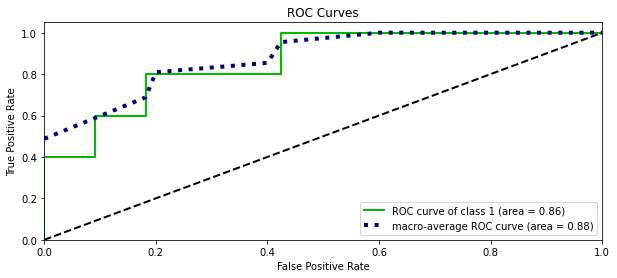



Precision-Recall Curve AUC:  0.61



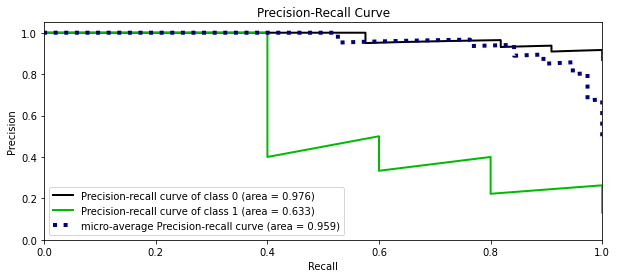

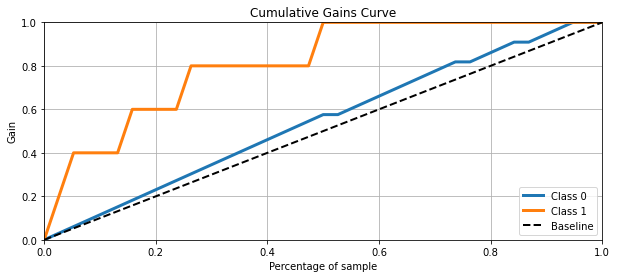

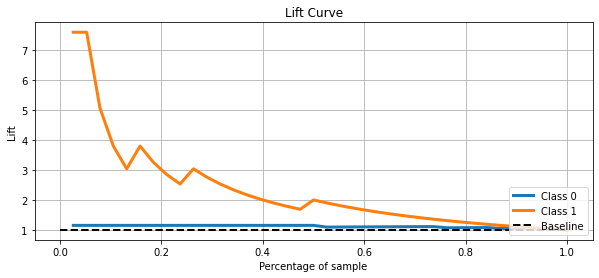



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.047        0.0        0.0
     0.052        0.2        0.0
     0.059        0.4        0.0
     0.068        0.4       0.09
     0.077        0.6       0.09
     0.078        0.6       0.18
     0.082        0.8       0.18
     0.085        0.8       0.42
     0.093        1.0       0.42
     0.093        1.0        1.0




In [17]:
x_over, y_over = over.fit_resample(X_train, y_train)
X_under_smote, y_under_smote = under.fit_resample(x_over, y_over)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_under_smote))

steps = [('over', over), ('under', under), ("scaler", StandardScaler()), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)


This method of oversampling and then undersampling is interesting but when you consider how much this particular data could be changed to synthetic data then
it seeems fair that the results would not be good.  You need to apply some reason to this method, to make sure what is being produced is reasonable.  

On a large dataset where the CV and Holdout sample sizes would be larger then I think it would be a better
approximation of the results.  I would also say that this method might not be good to fine tune a model where other methods like 
applying weights or penalizing wrong predictions on the original data would make for better approaches.  

## Balancing Data - Sampling Low Density Areas
- Adaptive Synthetic Sampling

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.398
Mean recall: 0.568
Mean precision: 0.314
Mean ROC AUC: 0.773


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=269, Test: 0=29, 1=29
>Train: 0=261, 1=269, Test: 0=29, 1=29
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261, 1=268, Test: 0=29, 1=30
>Train: 0=261

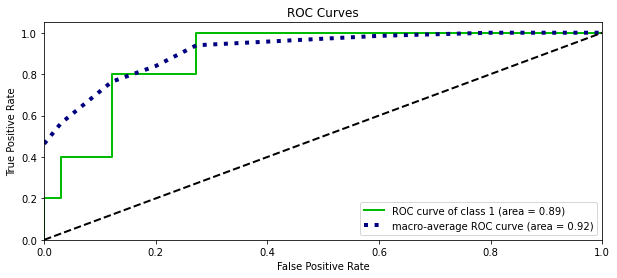



Precision-Recall Curve AUC:  0.55



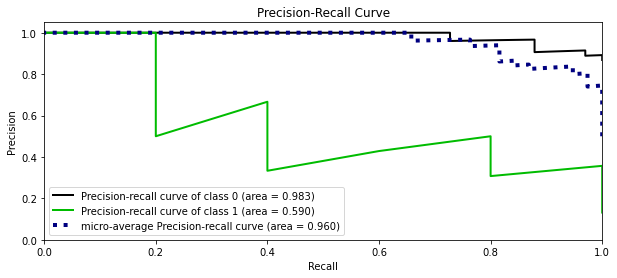

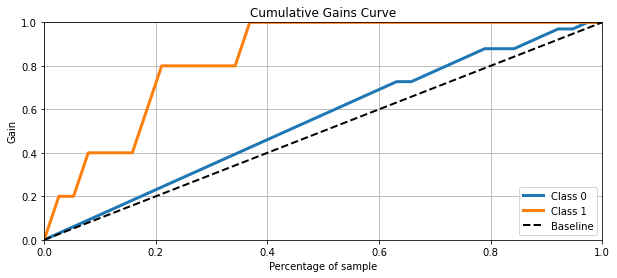

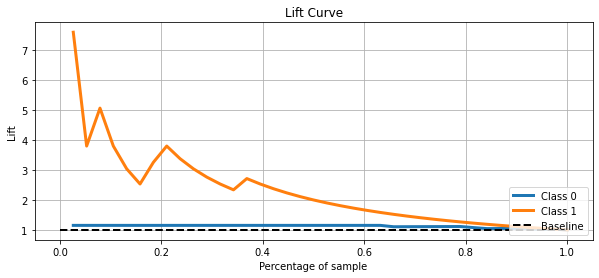



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.004        0.0        0.0
     0.006        0.2        0.0
     0.007        0.2       0.03
     0.008        0.4       0.03
     0.009        0.4       0.12
     0.009        0.8       0.12
     0.011        0.8       0.27
     0.012        1.0       0.27
     0.013        1.0        1.0




In [19]:
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', ADASYN(random_state=42)), ("scaler", StandardScaler()), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

model_evaluate(steps, cv, X_train, y_train, X_test, y_test)


This might be one of the more interesting results.  The Holdout method produces an ROC AUC of 0.89 and the cross validation ROC AUC is 0.773.  The cross validation score is similar to the better performing past balancing methods used.  This is an intersting result and the plot looks good but I am again hesitant to use this due to the small sampling sizes.   

## Balancing Data - Oversampling Misclassified

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({0: 290, 1: 290})
--------------------------------------------------


Cross Validation Prediction Scores - average of 30 runs
Mean f1: 0.414
Mean recall: 0.558
Mean precision: 0.342
Mean ROC AUC: 0.762


--------------------------------------------------


Cross Validation Datasets
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261, 1=261, Test: 0=29, 1=29
>Train: 0=261

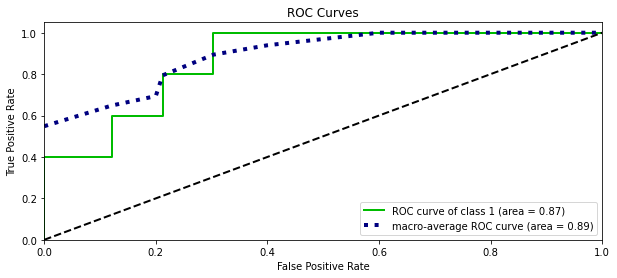



Precision-Recall Curve AUC:  0.6



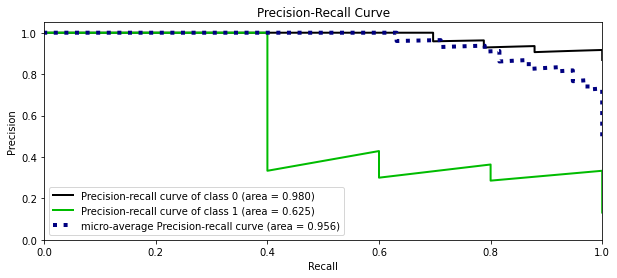

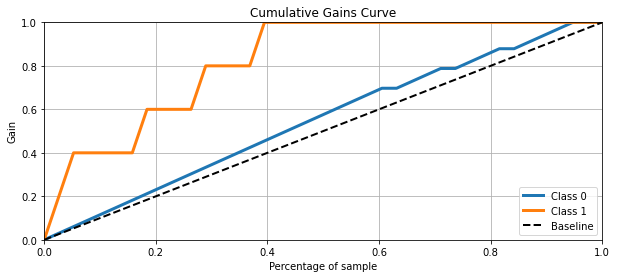

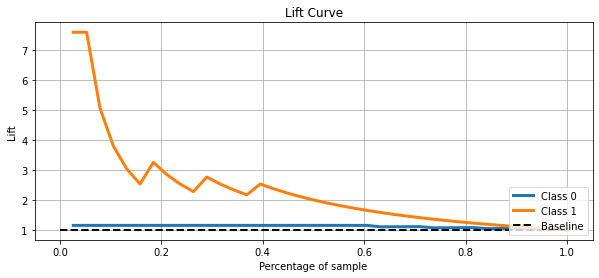



--------------------------------------------------


Print Thresholds

Thresholds        TPR        FPR
     0.005        0.0        0.0
     0.006        0.2        0.0
     0.006        0.4        0.0
     0.007        0.4       0.12
     0.008        0.6       0.12
      0.01        0.6       0.21
     0.012        0.8       0.21
     0.013        0.8        0.3
     0.014        1.0        0.3
     0.017        1.0        1.0




In [21]:
oversample = BorderlineSMOTE(random_state=42)
X_over_misc, y_over_misc = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_over_misc))

scoring = ('f1', 'recall', 'precision', 'roc_auc')
steps = [('over', BorderlineSMOTE(random_state=42)), ("scaler", StandardScaler()), ('model', SVC(probability=True, random_state=1))]
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model_evaluate(steps, cv, X_train, y_train, X_test, y_test)

The CV ROC AUC is 0.76 and the holdout method ROC AUC is 0.87.  
The recall-precision AUC is also 0.6 and CV mean precision 0.34

## Summary

All models performed very similarly.  
The most significant difference is the balancing effects on the Recall.  Recall typically scored between 0.55 and 0.59.
When looking at how the models handled the holdout data, I would say that SMOTE, ADASYN, and BorderlineSMOTE had the best ROC graphs.


Out of curiosity, I tested what the models produce without using StandardScaler() and here are two results:  

ADASYN  
Mean f1: 0.279  
Mean recall: 0.597  
Mean precision: 0.185  
Mean ROC AUC: 0.659  
  
SMOTE  
Mean f1: 0.292  
Mean recall: 0.578  
Mean precision: 0.200  
Mean ROC AUC: 0.662  


The same models produced these results after including StandardScaler():  

ADASYN  
Mean f1: 0.398  
Mean recall: 0.568  
Mean precision: 0.314  
Mean ROC AUC: 0.773  
  
SMOTE  
Mean f1: 0.393  
Mean recall: 0.553  
Mean precision: 0.318  
Mean ROC AUC: 0.772  


### Additional Thoughts

I should probably add the standard deviation as an output of the cross validation evaluation results so I can avoid choosing a method that has high inconsistency.  

Something I did with this dataset is that I filtered out values that were more than 1.5 times the interquartile range outside the 25% quartile and 75% quartile.  I think this greatly helped keep the distribution very similar after balancing since outliers were not duplicated or interpolated between valid values and outliers. I should do the analysis on unfiltered data also to compare the differences.  

### Here is me practicing how to articulate confusion matrices and metrics in simpler terms

The above two models (with StandardScaler) tell me that my predictions of myopic cases are 70% of the time predicting false positives and 45% of the myopic cases are being classified as false negatives.   

In other words, precision includes all the predictions above the threshold that are myopic predictions and those predictions are correct 30% of the time but don't include any myopic cases that were below the threshold that were predicted incorrectly.  This truly indicates what the odds of a 'is myopic' prediction being correct.  If we wanted to say what is the true accuracy of of all real myopia cases being predicted then we use recall and that shows 55% of all myopic cases are identified correctly (across all data aka across the threshold).  

Maybe here is another way of saying it:  Recall indicates of all the actual 'real-life' myopic cases, the percent that are classified correctly for a class like "is myopic".  This percent is considering the True positives and the False negatives which sum to be all the real myopic cases.  The precision is only looking at a subset of data and that is the data that is predicted to be myopic.  In this situation our percentage is considering the True positives and False positives.  So precision is looking at it solely from the myopic case quality in regards to the predictions and recall is looking at the myopic case quality in regards to actual myopic cases.  

When Recall is > Precision it means there are more False Positives then False negatives.  If false negatives are detrimental then the threshold that is evaluated agains the predictions probability can be increased - this can have the effect of converting some false positives into true negatives and boosting the precision score.  There is a tradeoff between precision and recall - typically with higher precision (fewer false positives) that incurs costs of lower recall (higher false negatives).

Putting these comments into context with the myopia example - right now we are predicting more false positives (lower precision) than false negatives (higher recall).  If this was a deadly communicable disease and we were screening people for treatment or protective measures then we would rather have a model that predicts fewer false negatives and more false positives.  This could be achieved by lowering the threshold of the models probability from 50% to a lower value.  In essence, you would not need to have as high of a likihood of being sick to be classified as sick.  Typically this results in a higher recall and a lower precision.  

Changing the threshold needs to be done in a sensible way because it could have bad consequences if lowered or raised.  For myopia in the situation where we are trying to identify people early for preventative treatment then it may make more sense to not identify people who may not have the condition considering the undue stress this may cause.  It may be more reasonable to have a model that has high precision (low false positives) and allow recall to lower (more false negatives).  In this case, to preemptively identify people with a model producing higher false negatives might require annual assessment.  

Based on the industry and situation (big picture), the acceptable balance between recall and precision can be different.   


 ## Final Conclusion  
 
 These two models are similar enough that it doesn't matter which one I choose based on the given data.  

## Moving the Threshold from 50%

In [22]:
from sklearn.metrics import classification_report

In [24]:
## Typical Model with threshold of 50%
oversample = ADASYN(random_state=42)

X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)

scaler = StandardScaler()
scaler.fit(X_low_density)
X_low_density_scaled = scaler.transform(X_low_density)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

model = SVC(probability=True, random_state=1)
model.fit(X_low_density_scaled, y_low_density)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.40      0.40      0.40         5

    accuracy                           0.84        38
   macro avg       0.65      0.65      0.65        38
weighted avg       0.84      0.84      0.84        38



In [28]:
## This shows .predict from above is using a threshold of 0.5
## This calc matches above
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

scaler = StandardScaler()
scaler.fit(X_low_density)
X_low_density_scaled = scaler.transform(X_low_density)

model = SVC(probability=True, random_state=1)
model.fit(X_low_density_scaled, y_low_density)


X_test_scaled = scaler.transform(X_test)
y_pred = model.predict_proba(X_test_scaled)
y_eval = [ 1 if myopic>0.5 else 0 for myopic in y_pred[:, 1]]

print(classification_report(y_test, y_eval))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
              precision    recall  f1-score   support

           0       0.93      0.42      0.58        33
           1       0.17      0.80      0.29         5

    accuracy                           0.47        38
   macro avg       0.55      0.61      0.43        38
weighted avg       0.83      0.47      0.54        38



In [25]:
## Adjust Threshold Example so theshold is lowered
## Should Increase Recall
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

scaler = StandardScaler()
scaler.fit(X_low_density)
X_low_density_scaled = scaler.transform(X_low_density)

model = SVC(probability=True, random_state=1)
model.fit(X_low_density_scaled, y_low_density)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict_proba(X_test_scaled)
y_eval = [ 1 if myopic>0.174 else 0 for myopic in y_pred[:, 1]]

print(classification_report(y_test, y_eval))


Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.40      0.80      0.53         5

    accuracy                           0.82        38
   macro avg       0.68      0.81      0.71        38
weighted avg       0.89      0.82      0.84        38



In [26]:
## Adjust Threshold Example so theshold is raised
## Should Increase Precision
oversample = ADASYN(random_state=42)
X_low_density, y_low_density = oversample.fit_resample(X_train, y_train)
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_low_density))

scaler = StandardScaler()
scaler.fit(X_low_density)
X_low_density_scaled = scaler.transform(X_low_density)

model = SVC(probability=True, random_state=1)
model.fit(X_low_density_scaled, y_low_density)

X_test_scaled = scaler.transform(X_test)
y_pred = model.predict_proba(X_test_scaled)
threshold = 0.8
y_eval = [ 1 if myopic>threshold else 0 for myopic in y_pred[:, 1]]

print(classification_report(y_test, y_eval))

Original dataset shape Counter({0: 290, 1: 44})
Resample dataset shape Counter({1: 298, 0: 290})
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.20      0.33         5

    accuracy                           0.89        38
   macro avg       0.95      0.60      0.64        38
weighted avg       0.91      0.89      0.86        38

